In [ ]:
# Observations:
# 1. I was testing with 20 tweets and noticed that Fox was by far the most positive. At first, I was surprised but assumed it 
# was due to the Kavanaugh news.
# 2. The average valence changes greatly depending on the number tweets you analyze.After I updated the script to get 
# 100 tweets CNN wasthe most positive.
# 3. There are a lot of nuetral tweets. This is probably a since so many words are neutral but you can see the cluster around 
# compound = 0 on the scatterplot.


In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#**BBC, CBS, CNN, Fox, and New York times**
users = ( "@CNN","@BBCWORLD","@CBSNEWS","@FOXNEWS","@NYTIMES")

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
name_list = []
time_list = []
text_list = []
tweets_ago_list = []
now = datetime.datetime.now()
for user in users:
    tweets_ago =0
    for x in range(1, 6):
        public_tweets = api.user_timeline(user, page=x)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            name_list.append(tweet["user"]["name"])
            time_list.append(tweet["created_at"])
            text_list.append(tweet["text"])
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago_list.append(tweets_ago)
            tweets_ago=tweets_ago+1 

tweets = pd.DataFrame(
    {"Name": name_list,
    "Text": text_list,
    "Time": time_list,
    "Pos": positive_list,
    "Neg": negative_list,
    "Neu": neutral_list,
    "Comp": compound_list,
    "Tweets_ago":tweets_ago_list}
    
)

tweets.head()

,Name,Text,Time,Pos,Neg,Neu,Comp,Tweets_ago
0,CNN,Tropical Storm Michael will likely slam the US...,Sun Oct 07 20:15:04 +0000 2018,0.0,0.167,0.833,-0.3818,0
1,CNN,"""Venom"" breaks records, and ""A Star Is Born"" s...",Sun Oct 07 20:00:15 +0000 2018,0.0,0.000,1.000,0.0000,1
2,CNN,A Chicago community is on edge as police hunt ...,Sun Oct 07 19:45:03 +0000 2018,0.0,0.000,1.000,0.0000,2
3,CNN,"""Horrific. ... This is the most deadly transpo...",Sun Oct 07 19:35:20 +0000 2018,0.0,0.157,0.843,-0.5209,3
4,CNN,What we know about the deadly New York limo cr...,Sun Oct 07 19:32:55 +0000 2018,0.0,0.275,0.725,-0.8020,4


In [3]:
tweets_pivot= tweets.pivot( index = 'Tweets_ago', columns='Name',values='Comp')
tweets_pivot.head()

Name,BBC News (World),CBS News,CNN,Fox News,The New York Times
Tweets_ago,,,,,
0,-0.3612,-0.4939,-0.3818,-0.6369,-0.4767
1,0.0000,0.0000,0.0000,0.0000,0.0000
2,-0.7906,-0.6597,0.0000,-0.6808,0.3612
3,-0.8126,-0.4019,-0.5209,-0.8720,0.0000
4,0.0000,-0.8591,-0.8020,0.4019,-0.2500


<function matplotlib.pyplot.show(*args, **kw)>

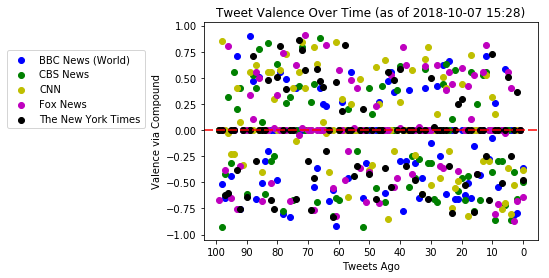

In [9]:

names = tweets['Name'].unique()
x= tweets['Tweets_ago']
x_axis = tweets_pivot.index.values
colors = ['b','g','y','M','K']
i = 0
for i in range(len(names)):
    plt.scatter( x_axis, tweets_pivot.iloc[:,i],color=colors[i])
    i += 1
plt.axhline(0,color='r',dashes=[6, 2])
plt.title('Tweet Valence Over Time (as of '+str(now.strftime("%Y-%m-%d %H:%M"))+')', {'fontsize': 12,
 'fontweight' :1})
plt.xlim( max(x)+5, min(x)-5)
plt.xticks(np.arange(min(x), max(x)+5, 10))
plt.legend(bbox_to_anchor=(0, .8),
           bbox_transform=plt.gcf().transFigure)
plt.xlabel("Tweets Ago")
plt.ylabel("Valence via Compound")
plt.show

In [5]:
avg_valence = tweets.groupby('Name').mean()
avg_valence = avg_valence.reset_index()
avg_valence = avg_valence.replace({
    'Name': {
        'BBC News (World)': 'BBC',
        'CBS News': 'CBS',
        'Fox News': 'FOX',
        'The New York Times': 'NYT',
    },
})
avg_valence.head()

,Name,Pos,Neg,Neu,Comp,Tweets_ago
0,BBC,0.06243,0.12176,0.81580,-0.107428,49.5
1,CBS,0.08153,0.11532,0.80313,-0.076680,49.5
2,CNN,0.07956,0.06254,0.85791,0.049641,49.5
3,FOX,0.07681,0.08459,0.83862,-0.002824,49.5
4,NYT,0.06172,0.07712,0.86116,-0.053019,49.5


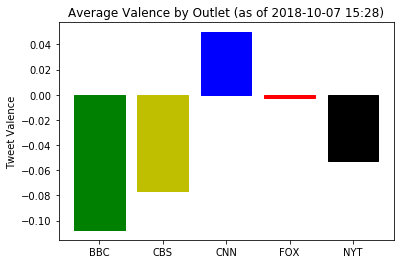

In [10]:

barlist= plt.bar(avg_valence['Name'],avg_valence['Comp'])
barlist[0].set_color('g')
barlist[1].set_color('y')
barlist[2].set_color('b')
barlist[3].set_color('r')
barlist[4].set_color('k')
plt.title('Average Valence by Outlet (as of '+str(now.strftime("%Y-%m-%d %H:%M"))+')', {'fontsize': 12,
 'fontweight' :1})
plt.ylabel("Tweet Valence")
plt.show()